# prepare dataset

In [ ]:
import tensorflow as tf
tf.executing_eagerly()


True

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/face_ff.zip"

Archive:  /content/gdrive/My Drive/face_ff.zip
   creating: sketches_f/
  inflating: sketches_f/F2-005-01-sz1.jpg  
  inflating: sketches_f/F2-006-01-sz1.jpg  
  inflating: sketches_f/F2-007-01-sz1.jpg  
  inflating: sketches_f/F2-008-01-sz1.jpg  
  inflating: sketches_f/F2-009-01-sz1.jpg  
  inflating: sketches_f/F2-010-01-sz1.jpg  
  inflating: sketches_f/F2-011-01-sz1.jpg  
  inflating: sketches_f/F2-012-01-sz1.jpg  
  inflating: sketches_f/F2-013-01-sz1.jpg  
  inflating: sketches_f/F2-014-01-sz1.jpg  
  inflating: sketches_f/F2-015-01-sz1.jpg  
  inflating: sketches_f/F2-016-01-sz1.jpg  
  inflating: sketches_f/F2-017-01-sz1.jpg  
  inflating: sketches_f/F2-018-01-sz1.jpg  
  inflating: sketches_f/F2-019-01-sz1.jpg  
  inflating: sketches_f/F2-020-01-sz1.jpg  
  inflating: sketches_f/F2-021-01-sz1.jpg  
  inflating: sketches_f/F2-022-01-sz1.jpg  
  inflating: sketches_f/F2-023-01-sz1.jpg  
  inflating: sketches_f/F2-024-01-sz1.jpg  
  inflating: sketches_f/F2-025-01-sz1.jpg  
  in

In [ ]:
import os
os.listdir()

['.config', 'sketches_f', 'gdrive', 'photos_f', 'sample_data']

In [ ]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
import cv2

# load all images in a directory into memory
def load_images(path, size=(250,200)):
	src_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in sorted(listdir(path)):
		# load and resize the image
		print(filename)
		#pixels = load_img(path + filename, target_size=size)

		img = cv2.imread(path + filename)
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
		crop_img = img[15:240, 0:200]
		resized_image = cv2.resize(crop_img, (256, 256))
		resized_image = np.float32(resized_image)

		src_list.append((resized_image - 127.5) / 127.5)

	return asarray(src_list)

In [ ]:
# dataset path
path = 'photos_f/'
# load dataset
foto_list = load_images(path)

f-005-01.jpg
f-006-01.jpg
f-007-01.jpg
f-008-01.jpg
f-009-01.jpg
f-010-01.jpg
f-011-01.jpg
f-012-01.jpg
f-013-01.jpg
f-014-01.jpg
f-015-01.jpg
f-016-01.jpg
f-017-01.jpg
f-018-01.jpg
f-019-01.jpg
f-020-01.jpg
f-021-01.jpg
f-022-01.jpg
f-023-01.jpg
f-024-01.jpg
f-025-01.jpg
f-026-01.jpg
f-027-01.jpg
f-028-01.jpg
f-029-01.jpg
f-030-01.jpg
f-031-01.jpg
f-032-01.jpg
f-033-01.jpg
f-034-01.jpg
f-035-01.jpg
f-036-01.jpg
f-037-01.jpg
f-038-01.jpg


In [ ]:
# dataset path
path = 'sketches_f/'
# load dataset
sk_list = load_images(path)

F2-005-01-sz1.jpg
F2-006-01-sz1.jpg
F2-007-01-sz1.jpg
F2-008-01-sz1.jpg
F2-009-01-sz1.jpg
F2-010-01-sz1.jpg
F2-011-01-sz1.jpg
F2-012-01-sz1.jpg
F2-013-01-sz1.jpg
F2-014-01-sz1.jpg
F2-015-01-sz1.jpg
F2-016-01-sz1.jpg
F2-017-01-sz1.jpg
F2-018-01-sz1.jpg
F2-019-01-sz1.jpg
F2-020-01-sz1.jpg
F2-021-01-sz1.jpg
F2-022-01-sz1.jpg
F2-023-01-sz1.jpg
F2-024-01-sz1.jpg
F2-025-01-sz1.jpg
F2-026-01-sz1.jpg
F2-027-01-sz1.jpg
F2-028-01-sz1.jpg
F2-029-01-sz1.jpg
F2-030-01-sz1.jpg
F2-031-01-sz1.jpg
F2-032-01-sz1.jpg
F2-033-01-sz1.jpg
F2-034-01-sz1.jpg
F2-035-01-sz1.jpg
F2-036-01-sz1.jpg
F2-037-01-sz1.jpg
F2-038-01-sz1.jpg


In [ ]:
print('Loaded: ', foto_list.shape, sk_list.shape)

Loaded:  (34, 256, 256, 3) (34, 256, 256, 3)


In [ ]:
src_ds = tf.data.Dataset.from_tensor_slices(foto_list)
tar_ds = tf.data.Dataset.from_tensor_slices(sk_list)

In [ ]:
dataset = tf.data.Dataset.zip((src_ds, tar_ds))

In [ ]:
dataset = dataset.batch(1, True)

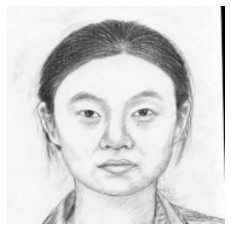

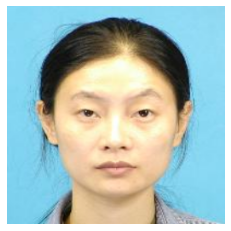

In [ ]:
i = 31

img = (sk_list[i] + 1)/2
plt.imshow(img)
plt.axis("off")
plt.show()

img = (foto_list[i] + 1)/2
plt.imshow(img)
plt.axis("off")
plt.show()




#

# Generator and discriminator

In [ ]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from matplotlib import pyplot

#from tensorflow.keras import layers

In [ ]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

In [ ]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
generator = define_generator((256,256,3))

In [ ]:
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 3136        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 128, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 128)  131200      leaky_re_lu[0][0]                
______________________________________________________________________________________________

In [ ]:
discriminator = define_discriminator((256,256,3))

In [ ]:
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 256, 256, 6)  0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 128, 64) 6208        concatenate_7[0][0]        

In [ ]:
# This method returns a helper function to compute the binary cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
mae = tf.keras.losses.MeanAbsoluteError()

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(generated_images, tar, fake_output):
    generator_loss1 = cross_entropy(tf.ones_like(fake_output),fake_output)
    generator_loss2 = mae(generated_images, tar)
    generator_loss = generator_loss1/101 + (generator_loss2 * 100)/101
    return generator_loss

In [ ]:
#learning_rate = 1e-5
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# training steps

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(src, tar):


    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      # Generator output
      generated_images = generator(src)

      # Discriminator output
      real_output = discriminator([src, tar])
      fake_output = discriminator([src, generated_images])

      # Loss functions
      gen_loss = generator_loss(generated_images, tar, fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # Gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Update both networks
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):


    for src, tar in dataset:
      train_step(src, tar)
    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    o = generator(tf.expand_dims(foto_list[0], 0))
    img = (o[0] + 1)/2
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    #generate_and_save_images(generator,epoch + 1,noise_vector)
    #print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))


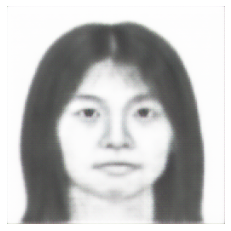

In [ ]:
#%%time
train(dataset, 5)

# save

In [ ]:
generator.save_weights('face2sk_gen/cp.ckpt')

In [ ]:
!cp -r "face2sk_gen" "/content/gdrive/My Drive/face2sk_gen"

In [ ]:
discriminator.save_weights('face2sk_dis/cp.ckpt')

In [ ]:
!cp -r "face2sk_dis" "/content/gdrive/My Drive/face2sk_dis"

# restore

In [ ]:
!cp -r "/content/gdrive/My Drive/face2sk_gen" "face2sk_gen"

In [ ]:
generator.load_weights('face2sk_gen/cp.ckpt')

In [ ]:
!cp -r "/content/gdrive/My Drive/face2sk_dis" "face2sk_dis"

In [ ]:
discriminator.load_weights('face2sk_dis/cp.ckpt')

# application

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving test4.jpg to test4.jpg


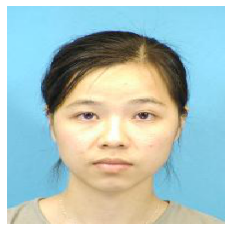

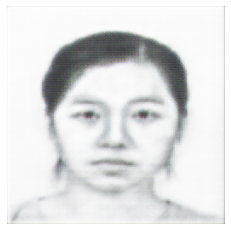

In [ ]:
pixels = load_img("f-043-01.jpg", target_size=(256,256))
# convert to numpy array
pixels = img_to_array(pixels)
img = (pixels - 127.5) / 127.5

plt.imshow((img+1)/2)
plt.axis("off")
plt.show()

o = generator(tf.expand_dims(img, 0))
img = (o[0] +1)/2
#print(o[0])
plt.imshow(img)
plt.axis("off")
plt.show()

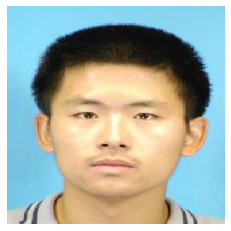

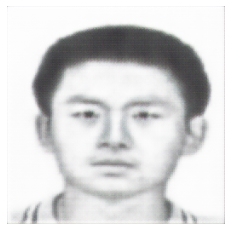

In [ ]:
pixels = load_img("m-069-01.jpg", target_size=(256,256))
# convert to numpy array
pixels = img_to_array(pixels)
img = (pixels - 127.5) / 127.5

plt.imshow((img+1)/2)
plt.axis("off")
plt.show()

o = generator(tf.expand_dims(img, 0))
img = (o[0] +1)/2
#print(o[0])
plt.imshow(img)
plt.axis("off")
plt.show()

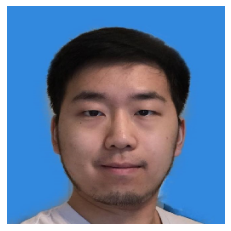

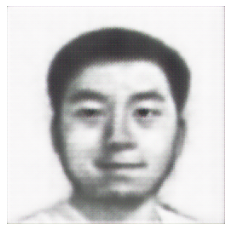

In [ ]:
pixels = load_img("test4.jpg", target_size=(256,256))
# convert to numpy array
pixels = img_to_array(pixels)
img = (pixels - 127.5) / 127.5

plt.imshow((img+1)/2)
plt.axis("off")
plt.show()

o = generator(tf.expand_dims(img, 0))
img = (o[0] +1)/2
#print(o[0])
plt.imshow(img)
plt.axis("off")
plt.show()